In [30]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [31]:
prices = Table.read_table('F2_bids_5.csv').sort('PORTFOLIO')
prices.where('PORTFOLIO', 'Big_Coal')

TEAM,TEAM_ID,PORTFOLIO,PORTFOLIO_ID,PLANT,PLANT_ID,PERIOD,PRICE1,PRICE2,PRICE3,PRICE4
Krugman,7,Big_Coal,1,Four Corners,11,5,346.5,36.5,36.5,346.5
Krugman,7,Big_Coal,1,ALAMITOS_7,12,5,75,75,75,75
Krugman,7,Big_Coal,1,HUNTINGTON_BEACH_1-2,13,5,40.5,40.5,40.5,40.5
Krugman,7,Big_Coal,1,HUNTINGTON_BEACH_5,14,5,67,67,367,67
Krugman,7,Big_Coal,1,REDONDO_5-6,15,5,42.3,41.94,41.94,42.3
Krugman,7,Big_Coal,1,REDONDO_7-8,16,5,242,242,41.94,242


In [32]:
# if you sort both tables by PORTFOLIO and Group respectively, you can see that the columns line up
ESG = Table.read_table('ESGPorfolios_.csv').sort("Group")
ESG.where('Group', 'Big_Coal')

Group,Group_num,UNIT NAME,Capacity_MW,Heat_Rate_MMBTUperMWh,Fuel_Price_USDperMMBTU,Fuel_Cost_USDperMWH,Var_OandM_USDperMWH,Total_Var_Cost_USDperMWH,Carbon_tonsperMWH,FixedCst_OandM_perDay
Big_Coal,1,FOUR CORNERS,1900,11.67,3,35,1.5,36.5,1.1,"$8,000"
Big_Coal,1,ALAMITOS 7,250,16.05,4.5,72.22,1.5,73.72,0.85,$0
Big_Coal,1,HUNTINGTON BEACH 1&2,300,8.67,4.5,39,1.5,40.5,0.46,"$2,000"
Big_Coal,1,HUNTINGTON BEACH 5,150,14.44,4.5,65,1.5,66.5,0.77,"$2,000"
Big_Coal,1,REDONDO 5&6,350,8.99,4.5,40.44,1.5,41.94,0.48,"$3,000"
Big_Coal,1,REDONDO 7&8,950,8.99,4.5,40.44,1.5,41.94,0.48,"$5,000"


In [33]:
def pair_cap_to_price(table1, table2, price_number):
    res = []
    for i in range(0, table1.num_rows):
        res.append((table1.column("Capacity_MW")[i], table2.column("PRICE" + str(price_number))[i]))
    return res

def find_x_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(widths))
    half_widths = [i/2 for i in widths]
    x_pos = []
    for i in range(0, len(half_widths)):
        x_pos.append(half_widths[i] + cumulative_widths[i])
    return x_pos

In [34]:
capacities = ESG.where("Group","Big_Coal").column('Capacity_MW')
capacities

array([1900,  250,  300,  150,  350,  950])

In [35]:
new_x_coal = find_x_pos(capacities)
new_x_coal

[950.0, 2025.0, 2300.0, 2525.0, 2775.0, 3425.0]

In [36]:
height_coal = prices.where('PORTFOLIO', 'Big_Coal').column('PRICE1')
height_coal = sorted(height_coal)

In [37]:
pairs = list(zip(new_x_coal, height_coal, capacities))
sorted_pairs = sorted(pairs, key=lambda x: x[0])

In [38]:
sorted_pairs[0]

(950.0, 40.5, 1900)

In [39]:
x_val = [x[0] for x in sorted_pairs]
y_val = [x[1] for x in sorted_pairs]
capacities = [x[2] for x in sorted_pairs]

In [40]:
sorted_pairs[4]

(2775.0, 242.0, 350)

In [41]:
y_val

[40.5, 42.3, 67.0, 75.0, 242.0, 346.5]

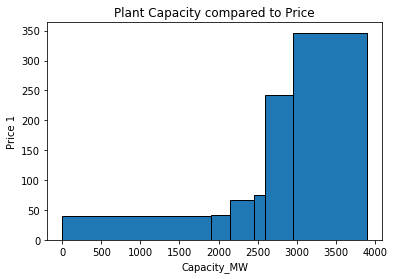

In [42]:
plt.bar(x_val, y_val, width=capacities)
plt.title('Plant Capacity compared to Price')
plt.xlabel('Capacity_MW')
plt.ylabel('Price 1')
plt.show()